<a href="https://colab.research.google.com/github/lmateo707/nfl2021_BigDataBowl/blob/main/Copy_of_passResult_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving plays.csv to plays.csv


In [ ]:
df = pd.read_csv("plays.csv")
# plays_df = pd.read_csv("Resources/plays.csv")
# week1 = pd.read_csv("Resources/week1.csv")
# week2 = pd.read_csv("Resources/week2.csv")
# week5 = pd.read_csv("Resources/week5.csv")
# week_df = pd.concat([week1, week2, week5], ignore_index=True)

In [ ]:
df = df.dropna()

In [ ]:
# plays_df = plays_df.drop(columns=['playDescription','possessionTeam', 'playType', 
#                         'yardlineSide', 'gameClock', 'penaltyCodes', 
#                         'penaltyJerseyNumbers',
#                      'personnelO', 'personnelD', 'typeDropback', 'offenseFormation', 'playId', 'quarter', 'yardlineNumber', 'preSnapHomeScore',
#                      'absoluteYardlineNumber', 'epa', 'preSnapVisitorScore'])

# plays_df.head()
df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
29,2018090600,1680,(1:57) (Shotgun) N.Foles pass short right to N...,2,2,10,PHI,play_type_pass,PHI,5,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,6.0,3.0,01:57:00,105.0,RPS,ATL 97,C,4,19,1.299050,False
45,2018090600,2503,(11:04) (Shotgun) M.Ryan pass incomplete short...,3,2,10,ATL,play_type_pass,ATL,32,EMPTY,"1 RB, 1 TE, 3 WR",5.0,4.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,6.0,3.0,11:04:00,42.0,ING,ATL 2,I,0,-12,-1.868122,False
91,2018090901,439,(8:05) (Shotgun) B.Roethlisberger pass short r...,1,3,9,PIT,play_type_pass,PIT,43,EMPTY,"1 RB, 1 TE, 3 WR",6.0,4.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,0.0,0.0,08:05:00,53.0,IBW,PIT 11,C,0,0,-1.770704,False
92,2018090901,493,(7:39) T.Taylor sacked at CLV 9 for -5 yards (...,1,1,10,CLE,play_type_sack,CLE,14,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"3 DL, 4 LB, 4 DB",SCRAMBLE,0.0,0.0,07:39:00,96.0,UNRd,PIT 90,S,-5,10,1.019909,False
108,2018090901,1452,(7:46) (Shotgun) T.Taylor pass short middle to...,2,3,6,CLE,play_type_pass,PIT,33,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,5.0,"2 DL, 3 LB, 6 DB",TRADITIONAL,7.0,0.0,07:46:00,77.0,UNR,CLE 12,C,1,-14,-2.734050,False


In [ ]:
df = df.drop(columns=['playDescription','possessionTeam', 'playType', 'yardlineSide', 'gameClock', 'penaltyCodes', 'penaltyJerseyNumbers','typeDropback'])

In [ ]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

df = pd.get_dummies(df)

df.head()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,offensePlayResult,playResult,epa,isDefensivePI,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_JUMBO,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT,"personnelO_0 RB, 0 TE, 5 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_1 RB, 1 TE, 3 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_2 RB, 0 TE, 3 WR","personnelO_2 RB, 1 TE, 2 WR","personnelO_2 RB, 2 TE, 1 WR","personnelO_3 RB, 1 TE, 1 WR","personnelO_6 OL, 1 RB, 1 TE, 2 WR","personnelO_6 OL, 1 RB, 2 TE, 1 WR","personnelO_6 OL, 2 RB, 1 TE, 0 WR,1 DL","personnelO_6 OL, 2 RB, 2 TE, 0 WR","personnelD_0 DL, 4 LB, 7 DB","personnelD_0 DL, 5 LB, 6 DB","personnelD_0 DL, 6 LB, 5 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_4 DL, 4 LB, 3 DB","personnelD_4 DL, 5 LB, 2 DB","personnelD_5 DL, 2 LB, 4 DB",passResult_C,passResult_I,passResult_IN,passResult_S
29,2018090600,1680,2,2,10,5,6.0,4.0,6.0,3.0,105.0,4,19,1.299050,False,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
45,2018090600,2503,3,2,10,32,5.0,4.0,6.0,3.0,42.0,0,-12,-1.868122,False,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
91,2018090901,439,1,3,9,43,6.0,4.0,0.0,0.0,53.0,0,0,-1.770704,False,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
92,2018090901,493,1,1,10,14,7.0,4.0,0.0,0.0,96.0,-5,10,1.019909,False,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
108,2018090901,1452,2,3,6,33,5.0,5.0,7.0,0.0,77.0,1,-14,-2.734050,False,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Set features. This will also be used as your x values.
selected_features = df[['quarter', 'down', 'yardsToGo', 'defendersInTheBox', 'numberOfPassRushers', 'isDefensivePI',
                        'offenseFormation_EMPTY',	'offenseFormation_I_FORM',	'offenseFormation_JUMBO',	'offenseFormation_PISTOL',	'offenseFormation_SHOTGUN',	'offenseFormation_SINGLEBACK',
                        'offenseFormation_WILDCAT',	'personnelO_0 RB, 0 TE, 5 WR',	'personnelO_0 RB, 1 TE, 4 WR',	'personnelO_1 RB, 0 TE, 4 WR',	'personnelO_1 RB, 1 TE, 3 WR',	'personnelO_1 RB, 2 TE, 2 WR',	
                        'personnelO_1 RB, 3 TE, 1 WR',	'personnelO_2 QB, 1 RB, 1 TE, 2 WR',	'personnelO_2 RB, 0 TE, 3 WR',	'personnelO_2 RB, 1 TE, 2 WR',	'personnelO_2 RB, 2 TE, 1 WR',
                        'personnelO_3 RB, 1 TE, 1 WR',	'personnelO_6 OL, 1 RB, 1 TE, 2 WR',	'personnelO_6 OL, 1 RB, 2 TE, 1 WR',	'personnelO_6 OL, 2 RB, 1 TE, 0 WR,1 DL',	'personnelO_6 OL, 2 RB, 2 TE, 0 WR',
                        'personnelD_0 DL, 4 LB, 7 DB',	'personnelD_0 DL, 5 LB, 6 DB',	'personnelD_0 DL, 6 LB, 5 DB',	'personnelD_1 DL, 3 LB, 7 DB',	'personnelD_1 DL, 4 LB, 6 DB',
                        'personnelD_1 DL, 5 LB, 5 DB',	'personnelD_2 DL, 2 LB, 7 DB',	'personnelD_2 DL, 3 LB, 6 DB',	'personnelD_2 DL, 4 LB, 5 DB',	'personnelD_3 DL, 1 LB, 7 DB',
                        'personnelD_3 DL, 2 LB, 6 DB',	'personnelD_3 DL, 3 LB, 5 DB',	'personnelD_3 DL, 4 LB, 4 DB',	'personnelD_3 DL, 5 LB, 3 DB',	'personnelD_4 DL, 1 LB, 6 DB',
                        'personnelD_4 DL, 2 LB, 5 DB',	'personnelD_4 DL, 3 LB, 4 DB',	'personnelD_4 DL, 4 LB, 3 DB',	'personnelD_4 DL, 5 LB, 2 DB',	'personnelD_5 DL, 2 LB, 4 DB'	]]

In [ ]:
defensive_features = df[['personnelD_0 DL, 4 LB, 7 DB',	'personnelD_0 DL, 5 LB, 6 DB',	'personnelD_0 DL, 6 LB, 5 DB',	'personnelD_1 DL, 3 LB, 7 DB',	'personnelD_1 DL, 4 LB, 6 DB',
                        'personnelD_1 DL, 5 LB, 5 DB',	'personnelD_2 DL, 2 LB, 7 DB',	'personnelD_2 DL, 3 LB, 6 DB',	'personnelD_2 DL, 4 LB, 5 DB',	'personnelD_3 DL, 1 LB, 7 DB',
                        'personnelD_3 DL, 2 LB, 6 DB',	'personnelD_3 DL, 3 LB, 5 DB',	'personnelD_3 DL, 4 LB, 4 DB',	'personnelD_3 DL, 5 LB, 3 DB',	'personnelD_4 DL, 1 LB, 6 DB',
                        'personnelD_4 DL, 2 LB, 5 DB',	'personnelD_4 DL, 3 LB, 4 DB',	'personnelD_4 DL, 4 LB, 3 DB',	'personnelD_4 DL, 5 LB, 2 DB',	'personnelD_5 DL, 2 LB, 4 DB']]

In [ ]:
offensive_features = df[['offenseFormation_EMPTY',	'offenseFormation_I_FORM',	'offenseFormation_JUMBO',	'offenseFormation_PISTOL',	'offenseFormation_SHOTGUN',	'offenseFormation_SINGLEBACK',
                        'offenseFormation_WILDCAT',	'personnelO_0 RB, 0 TE, 5 WR',	'personnelO_0 RB, 1 TE, 4 WR',	'personnelO_1 RB, 0 TE, 4 WR',	'personnelO_1 RB, 1 TE, 3 WR',	'personnelO_1 RB, 2 TE, 2 WR',	
                        'personnelO_1 RB, 3 TE, 1 WR',	'personnelO_2 QB, 1 RB, 1 TE, 2 WR',	'personnelO_2 RB, 0 TE, 3 WR',	'personnelO_2 RB, 1 TE, 2 WR',	'personnelO_2 RB, 2 TE, 1 WR',
                        'personnelO_3 RB, 1 TE, 1 WR',	'personnelO_6 OL, 1 RB, 1 TE, 2 WR',	'personnelO_6 OL, 1 RB, 2 TE, 1 WR',	'personnelO_6 OL, 2 RB, 1 TE, 0 WR,1 DL',	'personnelO_6 OL, 2 RB, 2 TE, 0 WR',]]

**Catch Predictions**

Logistic Regression-----

In [ ]:
from sklearn.model_selection import train_test_split
y = df["passResult_C"]
X = selected_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6903073286052009
Testing Data Score: 0.6408450704225352


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6126760563380281

In [ ]:
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.1974277432355352, 'yardsToGo'),
 (0.14064162267570135, 'quarter'),
 (0.1115488537006766, 'defendersInTheBox'),
 (0.10980254545900504, 'numberOfPassRushers'),
 (0.08776229294667327, 'down'),
 (0.03134991319172226, 'personnelD_4 DL, 2 LB, 5 DB'),
 (0.02640024894248119, 'personnelD_3 DL, 3 LB, 5 DB'),
 (0.02540925292922001, 'offenseFormation_SHOTGUN'),
 (0.02365071089450665, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.022993782510555737, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.019593961166280944, 'personnelO_1 RB, 1 TE, 3 WR'),
 (0.01879434179909631, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.018601106253136032, 'personnelO_1 RB, 2 TE, 2 WR'),
 (0.018210950008078562, 'offenseFormation_EMPTY'),
 (0.0181794502436335, 'isDefensivePI'),
 (0.015615975079785264, 'personnelD_2 DL, 3 LB, 6 DB'),
 (0.014906087077770856, 'offenseFormation_SINGLEBACK'),
 (0.010010343471914126, 'personnelD_4 DL, 3 LB, 4 DB'),
 (0.00939894313350837, 'personnelO_2 RB, 1 TE, 2 WR'),
 (0.009323883994627715, 'personnelD_1 DL, 4 LB, 6 DB

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.560, total=   0.0s
[CV] C=0.001, class_weight=balanced, max_iter=1000, penalty=l2 .......
[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.464, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, pena

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.01, class_weight=balanced, max_iter=1000, penalty=l2, score=0.548, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.643, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.643, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, scor

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=l2, score=0.518, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=l2 .........
[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=l2, score=0.506, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=l2 .........
[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=l2, score=0.541, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=l2 .........
[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=l2, score=0.679, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=l2 .........
[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=l2, score=0.583, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.624, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10,

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=1, class_weight=balanced, max_iter=100, penalty=l1, score=0.600, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=l1, score=0.529, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=l1, score=0.553, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=l1, score=0.714, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=l1, score=0.595, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=1, class_weight=balanced, max_iter=100, pena

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[CV]  C=5, class_weight=None, max_iter=100, penalty=l1, score=0.667, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=5, class_weight=None, max_iter=100, penalty=l1, score=0.571, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=5, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=5, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=5, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=5, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=5, class_weight=None, max_iter=100, penalty=none, score=nan, total= 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l1, score=0.541, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l1, score=0.576, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l1, score=0.690, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l1, score=0.655, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, pena

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=10, class_weight=None, max_iter=10, penalty=l1, score=0.583, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=none ..............
[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=none ..............
[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=none ..............
[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=none ..............
[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=none ..............
[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l2 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l2, score=0.635, total= 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l2, score=0.529, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l2 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l2, score=0.576, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l2 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l2, score=0.702, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l2 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l2, score=0.631, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=l1 ..........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=l1, score=0.612, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=l1 ..........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=l1, score=0.541, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=l1 ..........
[CV]  C=10, class_weight=balanced, max_iter=

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    2.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'class_weight': None, 'max_iter': 10, 'penalty': 'l2'}
0.6454061624649859


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6267605633802817

In [ ]:
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.1983558004792587, 'yardsToGo'),
 (0.1326221736926593, 'quarter'),
 (0.11908061728540294, 'defendersInTheBox'),
 (0.10236672469346776, 'numberOfPassRushers'),
 (0.08848479728582032, 'down'),
 (0.031715497699885256, 'personnelD_4 DL, 2 LB, 5 DB'),
 (0.02760412436971753, 'personnelD_3 DL, 3 LB, 5 DB'),
 (0.024535058945136638, 'offenseFormation_SHOTGUN'),
 (0.023763995816886506, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.022660824056218266, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.021632652793422604, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.018617509692347125, 'personnelO_1 RB, 1 TE, 3 WR'),
 (0.018413802394840313, 'isDefensivePI'),
 (0.018359796162863175, 'offenseFormation_EMPTY'),
 (0.017757659136738522, 'personnelD_2 DL, 3 LB, 6 DB'),
 (0.01735082140355481, 'personnelO_1 RB, 2 TE, 2 WR'),
 (0.017193134469146693, 'offenseFormation_SINGLEBACK'),
 (0.014121623681598602, 'personnelD_4 DL, 3 LB, 4 DB'),
 (0.010067719469138292, 'personnelD_1 DL, 4 LB, 6 DB'),
 (0.00814832304505119, 'personnelO_2 RB, 1 TE,

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.464, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=non

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.643, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.643, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.624, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.588, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.631, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.631, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedW

[CV]  C=1, class_weight=balanced, max_iter=100, penalty=l2, score=0.518, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=l2 ............
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=l2, score=0.565, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=l2 ............
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=l2, score=0.714, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=l2 ............
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=l2, score=0.619, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.600, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.529, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=1, class_weight=balanced, max_iter=1000, p

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.588, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l1 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.694, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l1 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.667, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l1 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.571, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=none .............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=none .............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=none .............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=none, score=nan, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l2, score=0.714, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l2 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l2, score=0.631, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.612, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.541, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.576, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.690, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000,

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=10, class_weight=None, max_iter=100, penalty=l1, score=0.667, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=l1 ...............
[CV]  C=10, class_weight=None, max_iter=100, penalty=l1, score=0.571, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=none .............
[CV]  C=10, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=none .............
[CV]  C=10, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=none .............
[CV]  C=10, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=none .............
[CV]  C=10, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=none .............
[CV]  C=10, class_weight=None, max_iter=100, penalty=none, score=nan, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=10, class_weight=balanced, max_iter=10, penalty=l2, score=0.702, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=10, penalty=l2 ............
[CV]  C=10, class_weight=balanced, max_iter=10, penalty=l2, score=0.631, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.612, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.541, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.600, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.702, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100,

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    2.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'class_weight': None, 'max_iter': 10, 'penalty': 'l2'}
0.6454061624649859


**Incomplete Predictions**

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
y = df["passResult_I"]
X = selected_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.789598108747045
Testing Data Score: 0.7535211267605634


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7323943661971831

In [ ]:
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.2211192384062812, 'yardsToGo'),
 (0.130711019779414, 'quarter'),
 (0.10480182543075657, 'numberOfPassRushers'),
 (0.10157371464050886, 'down'),
 (0.09467867794061104, 'defendersInTheBox'),
 (0.03662981948526432, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.03353138234308541, 'personnelD_4 DL, 2 LB, 5 DB'),
 (0.02690071809218013, 'offenseFormation_SHOTGUN'),
 (0.02579717855569668, 'personnelD_3 DL, 3 LB, 5 DB'),
 (0.021235814762631318, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.019966995056153437, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.019687046061380168, 'personnelO_1 RB, 1 TE, 3 WR'),
 (0.01825087352027949, 'offenseFormation_SINGLEBACK'),
 (0.01696147952495615, 'offenseFormation_EMPTY'),
 (0.012769677356673517, 'personnelO_1 RB, 2 TE, 2 WR'),
 (0.011907551285451982, 'personnelD_1 DL, 3 LB, 7 DB'),
 (0.01152425752745013, 'personnelD_5 DL, 2 LB, 4 DB'),
 (0.00969324443679561, 'personnelD_2 DL, 3 LB, 6 DB'),
 (0.009324128475009692, 'personnelD_4 DL, 3 LB, 4 DB'),
 (0.009320122497350161, 'isDefensivePI'

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.774, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.786, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.424, total=   0.0s
[CV] C=0.001, class_weight=balanced, max_iter=1000, penalty=l2 .......
[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.286, total=   0.0s
[CV] C=0.001, class_weight=balanced, max_iter=1000, penalty=l2 .......
[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.381, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.774, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.786, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblin

[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=l2, score=0.702, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.765, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.765, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.774, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.786, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWa

[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.529, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.659, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.612, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.548, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.690, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=1, class_weight=balanced, max_iter=100

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.762, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=none .............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=none .............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=none .............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=none .............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=none .............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l2 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.765, 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.529, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.671, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.694, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.548, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.655, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=100

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=10, class_weight=None, max_iter=100, penalty=l1, score=0.762, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=none .............
[CV]  C=10, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=none .............
[CV]  C=10, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=none .............
[CV]  C=10, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=none .............
[CV]  C=10, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=none .............
[CV]  C=10, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=l2 ...............
[CV]  C=10, class_weight=None, max_iter=100, penalty=l2, score=0.765, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.671, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.694, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.548, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.655, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=10

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    2.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.001, 'class_weight': None, 'max_iter': 10, 'penalty': 'l1'}
0.7777871148459383


**Sack Predictions**

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
y = df["passResult_S"]
X = selected_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9078014184397163
Testing Data Score: 0.9084507042253521


Random Forest Clasifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8943661971830986

In [ ]:
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.20761840660754044, 'yardsToGo'),
 (0.16798060981532173, 'quarter'),
 (0.12886648833817252, 'defendersInTheBox'),
 (0.11501929036395321, 'numberOfPassRushers'),
 (0.08384501653750931, 'down'),
 (0.04021069375835609, 'personnelD_3 DL, 3 LB, 5 DB'),
 (0.030883919054285072, 'personnelD_4 DL, 2 LB, 5 DB'),
 (0.02413887190754639, 'offenseFormation_SHOTGUN'),
 (0.023033954570667824, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.021068979168524852, 'offenseFormation_SINGLEBACK'),
 (0.01979920873108626, 'personnelD_1 DL, 4 LB, 6 DB'),
 (0.018195895053171533, 'personnelD_3 DL, 4 LB, 4 DB'),
 (0.017273268083865763, 'offenseFormation_EMPTY'),
 (0.015211738470121113, 'personnelO_1 RB, 1 TE, 3 WR'),
 (0.013921829265670262, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.013224527606844127, 'personnelO_1 RB, 2 TE, 2 WR'),
 (0.011224511378131621, 'personnelD_4 DL, 3 LB, 4 DB'),
 (0.008807041727160092, 'personnelD_1 DL, 5 LB, 5 DB'),
 (0.0068084606847177665, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.00624761722016413, 'person

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.906, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.906, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.906, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.917, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.905, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.906, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.906, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.917, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.905, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, scor

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.906, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.917, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.905, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.906, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.906, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.906, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.9

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

[CV]  C=1, class_weight=None, max_iter=10, penalty=l2, score=0.905, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.906, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.906, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.906, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.917, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.905, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total=  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.583, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.595, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=1, class_weight=balanced, max_iter=100

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.894, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l2 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.906, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l2 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.906, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l2 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.917, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l2 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.905, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=10, penalty=l1 .............
[CV]  C=5, class_weight=balanced, max_iter=10, penalty=l1, score=0.635, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=10, penalty=l1 .............
[CV]  C=5, class_weight=balanced, max_iter=10, penalty=l1, score=0.5

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l1, score=0.619, total=   0.1s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l1, score=0.631, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, pena

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.619, total=   0.1s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.631, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=100

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.894, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.906, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.906, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.917, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.905, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=none ............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=none ............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=none, scor

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.553, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.659, total=   0.1s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.619, total=   0.3s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.607, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=10

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=l1, score=0.659, total=   0.1s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=l1 ..........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=l1, score=0.619, total=   0.2s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=l1 ..........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=l1, score=0.607, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=none ........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=none ........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=none ........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=none ........
[CV]  C=10, class_weight=balanced, max_i

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    2.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.001, 'class_weight': None, 'max_iter': 10, 'penalty': 'l1'}
0.9078151260504201


**Interceptions Predictions**

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
y = df["passResult_IN"]
X = selected_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9621749408983451
Testing Data Score: 0.9577464788732394


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9436619718309859

In [ ]:
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.12568724377972798, 'yardsToGo'),
 (0.12491065975043933, 'defendersInTheBox'),
 (0.10509502992448035, 'quarter'),
 (0.10324992894545217, 'down'),
 (0.09040993784890385, 'numberOfPassRushers'),
 (0.062407022270583416, 'personnelD_0 DL, 6 LB, 5 DB'),
 (0.04632735980987631, 'personnelD_3 DL, 3 LB, 5 DB'),
 (0.043686198257616715, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.03334178385759399, 'personnelD_1 DL, 5 LB, 5 DB'),
 (0.03255962587722282, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.025719222166745118, 'offenseFormation_SHOTGUN'),
 (0.02508729287788495, 'offenseFormation_WILDCAT'),
 (0.020831777085914643, 'personnelD_4 DL, 2 LB, 5 DB'),
 (0.02034364436744551, 'offenseFormation_EMPTY'),
 (0.019101686532735345, 'offenseFormation_PISTOL'),
 (0.016548557252853483, 'personnelO_1 RB, 0 TE, 4 WR'),
 (0.014957813158674988, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.014814579095842908, 'personnelO_1 RB, 1 TE, 3 WR'),
 (0.01100657147369793, 'personnelD_2 DL, 3 LB, 6 DB'),
 (0.01034684697606083, 'personnelO_2 QB, 

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.753, total=   0.0s
[CV] C=0.001, class_weight=balanced, max_iter=1000, penalty=l2 .......
[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.643, total=   0.0s
[CV] C=0.001, class_weight=balanced, max_iter=1000, penalty=l2 .......
[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.857, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.01, class_weight=balanced, max_iter=1000, penalty=l2, score=0.565, total=   0.0s
[CV] C=0.01, class_weight=balanced, max_iter=1000, penalty=l2 ........
[CV]  C=0.01, class_weight=balanced, max_iter=1000, penalty=l2, score=0.694, total=   0.0s
[CV] C=0.01, class_weight=balanced, max_iter=1000, penalty=l2 ........
[CV]  C=0.01, class_weight=balanced, max_iter=1000, penalty=l2, score=0.631, total=   0.0s
[CV] C=0.01, class_weight=balanced, max_iter=1000, penalty=l2 ........
[CV]  C=0.01, class_weight=balanced, max_iter=1000, penalty=l2, score=0.738, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblin

[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.417, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=l1 .........
[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=l1, score=0.512, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=none .......
[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=none .......
[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=none .......
[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=none .......
[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=none .......
[CV]  C=0.1, class_weight=balanced

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=1, class_weight=balanced, max_iter=100, penalty=l1, score=0.786, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=1, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=100, penalty=l2 ............
[CV]  C=1, class_weight=balanced, max_iter=100, pena

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.965, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l2 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.965, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l2 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.953, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l2 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.952, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l2 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l2, score=0.964, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=10, penalty=l1 .............
[CV]  C=5, class_weight=balanced, max_iter=10, penalty=l1, score=0.788, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=10, penalty=l1 .............
[CV]  C=5, class_weight=balanced, max_iter=10, penalty=l1, score=0.6

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l1, score=0.647, total=   0.3s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l1, score=0.800, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l1, score=0.810, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l1 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l1, score=0.821, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=none ..........
[CV]  C=5, class_weight=balanced, max_iter=100, pena

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=10, class_weight=None, max_iter=1000, penalty=l2, score=0.953, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l2 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l2, score=0.952, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l2 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l2, score=0.964, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=10, penalty=l1 ............
[CV]  C=10, class_weight=balanced, max_iter=10, penalty=l1, score=0.788, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=10, penalty=l1 ............
[CV]  C=10, class_weight=balanced, max_iter=10, penalty=l1, score=0.671, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=10, penalty=l1 ............
[CV]  C=10, class_weight=balanced, max_iter=10, penalty=l1, score=0.812, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=10, penalty=l1 ............
[CV]  C=10, class_weight=balanced, max_iter=10, penalty=l1

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.659, total=   0.4s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.812, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.821, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.833, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=10

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=l1, score=0.659, total=   0.4s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=l1 ..........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=l1, score=0.812, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=l1 ..........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=l1, score=0.821, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=l1 ..........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=l1, score=0.833, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=none ........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=none ........
[CV]  C=10, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=1000, penalty=none ........
[CV]  C=10, class_weight=balanced, max_i

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    3.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.001, 'class_weight': None, 'max_iter': 10, 'penalty': 'l1'}
0.9621848739495797


**Cacth Predictions vs Defensive formations**

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
y = df["passResult_C"]
X = defensive_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6666666666666666
Testing Data Score: 0.647887323943662


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.647887323943662

In [ ]:
sorted(zip(rf.feature_importances_, defensive_features), reverse=True)

[(0.11817886199515684, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.0960467812181997, 'personnelD_1 DL, 3 LB, 7 DB'),
 (0.08663034763422026, 'personnelD_2 DL, 3 LB, 6 DB'),
 (0.0825616052977587, 'personnelD_3 DL, 3 LB, 5 DB'),
 (0.07742417442375048, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.06329022515732025, 'personnelD_4 DL, 2 LB, 5 DB'),
 (0.05689463652540575, 'personnelD_5 DL, 2 LB, 4 DB'),
 (0.047880087242517966, 'personnelD_3 DL, 4 LB, 4 DB'),
 (0.047069938820385626, 'personnelD_0 DL, 5 LB, 6 DB'),
 (0.04669304522576907, 'personnelD_2 DL, 2 LB, 7 DB'),
 (0.04396021901650335, 'personnelD_4 DL, 5 LB, 2 DB'),
 (0.041137936271968746, 'personnelD_0 DL, 6 LB, 5 DB'),
 (0.04098097561491446, 'personnelD_4 DL, 3 LB, 4 DB'),
 (0.03265923312154754, 'personnelD_1 DL, 5 LB, 5 DB'),
 (0.02800516301864057, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.027046882540620928, 'personnelD_1 DL, 4 LB, 6 DB'),
 (0.017618448419319515, 'personnelD_0 DL, 4 LB, 7 DB'),
 (0.017270587750264906, 'personnelD_3 DL, 1 LB, 7 DB'),
 (0.01

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.560, total=   0.0s
[CV] C=0.001, class_weight=balanced, max_iter=1000, penalty=l2 .......
[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.583, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, pena

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.643, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.647, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.624, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.612, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.643, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.643, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.624, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.612, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.655, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.655, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l2, score=0.583, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l1 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l1, score=0.659, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l1 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l1, score=0.624, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l1 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l1, score=0.612, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l1 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l1, score=0.655, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l1 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l1, score=0.655, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=none ..............
[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, to

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.001, 'class_weight': None, 'max_iter': 10, 'penalty': 'l2'}
0.6453781512605042


**Incomplete Passes vs Offense formations**

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
y = df["passResult_I"]
X = offensive_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7777777777777778
Testing Data Score: 0.7746478873239436


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7746478873239436

In [ ]:
sorted(zip(rf.feature_importances_, offensive_features), reverse=True)

[(0.17278121938432106, 'offenseFormation_SINGLEBACK'),
 (0.15652112694989118, 'offenseFormation_SHOTGUN'),
 (0.1039115873864774, 'personnelO_1 RB, 1 TE, 3 WR'),
 (0.09029890041632245, 'offenseFormation_EMPTY'),
 (0.08282439556167277, 'personnelO_2 RB, 0 TE, 3 WR'),
 (0.06713815568561635, 'personnelO_1 RB, 2 TE, 2 WR'),
 (0.05908780910696917, 'personnelO_2 RB, 1 TE, 2 WR'),
 (0.04056300502179972, 'personnelO_1 RB, 0 TE, 4 WR'),
 (0.03941029635497138, 'offenseFormation_PISTOL'),
 (0.03824762832193202, 'personnelO_1 RB, 3 TE, 1 WR'),
 (0.03598235784842437, 'offenseFormation_I_FORM'),
 (0.02757076144052553, 'personnelO_6 OL, 2 RB, 2 TE, 0 WR'),
 (0.024012797993616115, 'personnelO_0 RB, 1 TE, 4 WR'),
 (0.021625205483647974, 'offenseFormation_JUMBO'),
 (0.014809669620029919, 'personnelO_2 QB, 1 RB, 1 TE, 2 WR'),
 (0.007741219771441199, 'personnelO_3 RB, 1 TE, 1 WR'),
 (0.00545407488465087, 'personnelO_2 RB, 2 TE, 1 WR'),
 (0.0038747395467362503, 'personnelO_6 OL, 1 RB, 1 TE, 2 WR'),
 (0.0038

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.774, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.786, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.774, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.786, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, scor

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.774, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.786, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.7

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.776, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.776, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.774, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.786, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total= 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=5, class_weight=None, max_iter=10, penalty=l2, score=0.765, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l2 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l2, score=0.774, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l2 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l2, score=0.786, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=5, class_weight=None, max_iter=100, penalty=l1, score=0.776, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=5, class_weight=None, max_iter=100, penalty=l1, score=0.741, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=5, class_weight=None, max_iter=100, penalty=l1, score=0.765, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=5, class_weight=None, max_iter=100, penalty=l1, score=0.774, total=   0

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.405, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=none .........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l2 ...........
[CV]  C=5, class_weight=balanced, max_iter=100

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.482, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.417, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=l1 ...........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=l1, score=0.405, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, max_iter=100, penalty=none .........
[CV]  C=10, class_weight=balanced, max_iter=10

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    1.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.001, 'class_weight': None, 'max_iter': 10, 'penalty': 'l1'}
0.7777871148459383


**Exta DB's and Incomplete Catches**

Logistic Regression

In [ ]:
moreDB_features = df[['personnelD_0 DL, 4 LB, 7 DB',	'personnelD_0 DL, 5 LB, 6 DB',	'personnelD_0 DL, 6 LB, 5 DB',	'personnelD_1 DL, 3 LB, 7 DB',	
                      'personnelD_1 DL, 4 LB, 6 DB', 'personnelD_1 DL, 5 LB, 5 DB',	'personnelD_2 DL, 2 LB, 7 DB', 'personnelD_2 DL, 4 LB, 5 DB',	
                      'personnelD_3 DL, 1 LB, 7 DB', 'personnelD_3 DL, 2 LB, 6 DB', 'personnelD_4 DL, 1 LB, 6 DB']]

In [ ]:
from sklearn.model_selection import train_test_split
y = df["passResult_I"]
X = moreDB_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7777777777777778
Testing Data Score: 0.7746478873239436


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7816901408450704

In [ ]:
sorted(zip(rf.feature_importances_, moreDB_features), reverse=True)

[(0.480561568034703, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.25771703021652276, 'personnelD_1 DL, 3 LB, 7 DB'),
 (0.08801723490009988, 'personnelD_3 DL, 1 LB, 7 DB'),
 (0.044912137093885696, 'personnelD_1 DL, 5 LB, 5 DB'),
 (0.04243010860883906, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.0383425271128586, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.03831791106288419, 'personnelD_1 DL, 4 LB, 6 DB'),
 (0.009701482970206836, 'personnelD_0 DL, 6 LB, 5 DB'),
 (0.0, 'personnelD_2 DL, 2 LB, 7 DB'),
 (0.0, 'personnelD_0 DL, 5 LB, 6 DB'),
 (0.0, 'personnelD_0 DL, 4 LB, 7 DB')]

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.774, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.786, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.774, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.786, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, scor

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.774, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.786, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.776, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.7

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.776, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.774, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.786, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total= 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=5, class_weight=None, max_iter=100, penalty=l2, score=0.774, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=l2 ................
[CV]  C=5, class_weight=None, max_iter=100, penalty=l2, score=0.786, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l1 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.776, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l1 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.765, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l1 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.776, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l1 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.774, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l1 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.786, to

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedW

[CV]  C=10, class_weight=None, max_iter=100, penalty=l2, score=0.786, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.776, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.765, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.776, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.774, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.786, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=none ............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=none, score

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedW

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l1'}
0.7778711484593837


**Extra DB and Interceptions**

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
y = df["passResult_IN"]
X = moreDB_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9621749408983451
Testing Data Score: 0.9577464788732394


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)



0.9577464788732394

In [ ]:
sorted(zip(rf.feature_importances_, moreDB_features), reverse=True)

[(0.38706148615140845, 'personnelD_0 DL, 6 LB, 5 DB'),
 (0.25980175498120567, 'personnelD_1 DL, 5 LB, 5 DB'),
 (0.22615834896180423, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.09202256240900855, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.021399128052910533, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.008115170387162668, 'personnelD_1 DL, 4 LB, 6 DB'),
 (0.0028195274926657654, 'personnelD_1 DL, 3 LB, 7 DB'),
 (0.0009545529743424468, 'personnelD_0 DL, 4 LB, 7 DB'),
 (0.0009087444425528068, 'personnelD_2 DL, 2 LB, 7 DB'),
 (0.0007587241469387498, 'personnelD_3 DL, 1 LB, 7 DB'),
 (0.0, 'personnelD_0 DL, 5 LB, 6 DB')]

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.765, total=   0.0s
[CV] C=0.001, class_weight=balanced, max_iter=1000, penalty=l2 .......
[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.845, total=   0.0s
[CV] C=0.001, class_weight=balanced, max_iter=1000, penalty=l2 .......
[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.774, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l2, score=0.812, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l2 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l2, score=0.741, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l2 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l2, score=0.765, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l2 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l2, score=0.845, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=100, penalty=l2 ............
[CV]  C=5, class_weight=balanced, max_iter=100, penalty=l2, score=0.774, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, penalty=l1, score=0.812, total=   0.0s
[CV] C=5, class_weight=balanced, max_iter=1000, penalty=l1 ...........
[CV]  C=5, class_weight=balanced, max_iter=1000, pe

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:

print(grid.best_params_)
print(grid.best_score_)

{'C': 0.001, 'class_weight': None, 'max_iter': 10, 'penalty': 'l1'}
0.9621848739495797


**Extra DB and Sacks**

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
y = df["passResult_IN"]
X = moreDB_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9621749408983451
Testing Data Score: 0.9577464788732394


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.9577464788732394

In [ ]:
sorted(zip(rf.feature_importances_, moreDB_features), reverse=True)

[(0.3700039750704744, 'personnelD_0 DL, 6 LB, 5 DB'),
 (0.2785337993786288, 'personnelD_1 DL, 5 LB, 5 DB'),
 (0.2267598706299835, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.08339559236112096, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.027499569590826948, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.007918816877733454, 'personnelD_1 DL, 4 LB, 6 DB'),
 (0.0029498621978938174, 'personnelD_1 DL, 3 LB, 7 DB'),
 (0.001408208815311327, 'personnelD_3 DL, 1 LB, 7 DB'),
 (0.0008218565589734958, 'personnelD_0 DL, 4 LB, 7 DB'),
 (0.0007084485190532391, 'personnelD_2 DL, 2 LB, 7 DB'),
 (0.0, 'personnelD_0 DL, 5 LB, 6 DB')]

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, scor

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=none .............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=none, score=nan, 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=1, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=none ...............
[CV]  C=5, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l2 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l2, score=0.965, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l2 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l2, score=0.965, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l2 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l2, score=0.953, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l2 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l2, score=0.964, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l2 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l2, score=0.964, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=l1 ...............
[CV]  C=10, class_weight=None, max_iter=100, penalty=l1, score=0.965, total=

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.001, 'class_weight': None, 'max_iter': 10, 'penalty': 'l1'}
0.9621848739495797


**Extra DB's and Catches**

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
y = df["passResult_C"]
X = moreDB_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6548463356973995
Testing Data Score: 0.647887323943662


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6549295774647887

In [ ]:
sorted(zip(rf.feature_importances_, moreDB_features), reverse=True)

[(0.22406002596642352, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.16346305528014304, 'personnelD_1 DL, 3 LB, 7 DB'),
 (0.11205648929139433, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.10394830669065394, 'personnelD_0 DL, 6 LB, 5 DB'),
 (0.08109353213350273, 'personnelD_2 DL, 2 LB, 7 DB'),
 (0.07503395862979552, 'personnelD_1 DL, 4 LB, 6 DB'),
 (0.06425766619230153, 'personnelD_0 DL, 5 LB, 6 DB'),
 (0.05523670800190248, 'personnelD_1 DL, 5 LB, 5 DB'),
 (0.04807300258295405, 'personnelD_3 DL, 1 LB, 7 DB'),
 (0.04489375492344997, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.027883500307479, 'personnelD_0 DL, 4 LB, 7 DB')]

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.357, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.600, total=   0.0s
[CV] C=0.001, class_weight=balanced, max_iter=1000, penalty=l2 .......
[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.667, total=   0.0s
[CV] C=0.001, class_weight=balanced, max_iter=1000, penalty=l2 .......
[CV]  C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, score=0.643, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.353, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.01, class_weight=balanced, max_iter=1000, penalty=l2, score=0.667, total=   0.0s
[CV] C=0.01, class_weight=balanced, max_iter=1000, penalty=l2 ........
[CV]  C=0.01, class_weight=balanced, max_iter=1000, penalty=l2, score=0.643, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1, score=0.643, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l1 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l1,

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=l2, score=0.667, total=   0.0s
[CV] C=0.1, class_weight=balanced, max_iter=1000, penalty=l2 .........
[CV]  C=0.1, class_weight=balanced, max_iter=1000, penalty=l2, score=0.643, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.647, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.635, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.612, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.643, total=   0.0s
[CV] C=1, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=1, class_weight=None, max_iter=10, penalty=l1, score=0.643

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l2, score=0.667, total=   0.0s
[CV] C=1, class_weight=balanced, max_iter=1000, penalty=l2 ...........
[CV]  C=1, class_weight=balanced, max_iter=1000, penalty=l2, score=0.643, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.659, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.635, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.612, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.655, total=   0.0s
[CV] C=5, class_weight=None, max_iter=10, penalty=l1 .................
[CV]  C=5, class_weight=None, max_iter=10, penalty=l1, score=0.655, to

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

[CV]  C=10, class_weight=None, max_iter=10, penalty=l1, score=0.612, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l1 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l1, score=0.655, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=l1 ................
[CV]  C=10, class_weight=None, max_iter=10, penalty=l1, score=0.655, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=none ..............
[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=none ..............
[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=none ..............
[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=None, max_iter=10, penalty=none ..............
[CV]  C=10, class_weight=None, max_iter=10, penalty=none, score=nan, total= 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.001, 'class_weight': None, 'max_iter': 10, 'penalty': 'l2'}
0.6453781512605042


**Offensive Formation agaisnt Extra DB's**

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
y = df["offenseFormation_SHOTGUN"]
X = moreDB_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6312056737588653
Testing Data Score: 0.6338028169014085


In [ ]:
# How can we test this againt catch or incomplete
# What does the test results actually tell us
# How can we improve this

In [ ]:
# show different style
# explain what we are trying to solve
# predicting y solves x
# Random Forest - these featurs were the most important
# grid search - 
# graphs of important features

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6338028169014085

In [ ]:
sorted(zip(rf.feature_importances_, moreDB_features), reverse=True)

[(0.24144433734371795, 'personnelD_2 DL, 4 LB, 5 DB'),
 (0.2248755528012483, 'personnelD_3 DL, 2 LB, 6 DB'),
 (0.12714474143252197, 'personnelD_1 DL, 4 LB, 6 DB'),
 (0.09455797707776702, 'personnelD_1 DL, 5 LB, 5 DB'),
 (0.06541605763485486, 'personnelD_1 DL, 3 LB, 7 DB'),
 (0.06421806328584258, 'personnelD_4 DL, 1 LB, 6 DB'),
 (0.05958126270966212, 'personnelD_2 DL, 2 LB, 7 DB'),
 (0.04402575367405251, 'personnelD_3 DL, 1 LB, 7 DB'),
 (0.04120038127563228, 'personnelD_0 DL, 6 LB, 5 DB'),
 (0.037535872764700454, 'personnelD_0 DL, 5 LB, 6 DB'),
 (0.0, 'personnelD_0 DL, 4 LB, 7 DB')]

Grid Search

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [.001, .01, .1, 1, 5, 10],
              'max_iter': [10, 100,1000],
              'class_weight': [None, 'balanced'],
              'penalty': ["l1","none", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=l1 .............
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.001, class_weight=None, max_iter=10, penalty=none ...........
[CV]  C=0.001, class_weight=None, max_iter=10, penalty=none, score=nan, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test p

[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.953, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=l1 ..............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=l1, score=0.964, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=None, max_iter=10, penalty=none ............
[CV]  C=0.01, class_weight=None, max_iter=10, penalty=none, scor

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.965, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.953, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.953, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.964, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=10, penalty=l2 ...............
[CV]  C=0.1, class_weight=None, max_iter=10, penalty=l2, score=0.964, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.965, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=100, penalty=l1 ..............
[CV]  C=0.1, class_weight=None, max_iter=100, penalty=l1, score=0.953

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.964, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=l1 ................
[CV]  C=1, class_weight=None, max_iter=100, penalty=l1, score=0.964, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=None, max_iter=100, penalty=none ..............
[CV]  C=1, class_weight=None, max_iter=100, penalty=none, score=nan, total= 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=5, class_weight=None, max_iter=100, penalty=l2, score=0.965, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=l2 ................
[CV]  C=5, class_weight=None, max_iter=100, penalty=l2, score=0.953, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=l2 ................
[CV]  C=5, class_weight=None, max_iter=100, penalty=l2, score=0.953, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=l2 ................
[CV]  C=5, class_weight=None, max_iter=100, penalty=l2, score=0.964, total=   0.0s
[CV] C=5, class_weight=None, max_iter=100, penalty=l2 ................
[CV]  C=5, class_weight=None, max_iter=100, penalty=l2, score=0.964, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l1 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.965, total=   0.0s
[CV] C=5, class_weight=None, max_iter=1000, penalty=l1 ...............
[CV]  C=5, class_weight=None, max_iter=1000, penalty=l1, score=0.953, total

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFaile

[CV]  C=10, class_weight=None, max_iter=100, penalty=l2, score=0.953, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=l2 ...............
[CV]  C=10, class_weight=None, max_iter=100, penalty=l2, score=0.953, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=l2 ...............
[CV]  C=10, class_weight=None, max_iter=100, penalty=l2, score=0.964, total=   0.0s
[CV] C=10, class_weight=None, max_iter=100, penalty=l2 ...............
[CV]  C=10, class_weight=None, max_iter=100, penalty=l2, score=0.964, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.965, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.953, total=   0.0s
[CV] C=10, class_weight=None, max_iter=1000, penalty=l1 ..............
[CV]  C=10, class_weight=None, max_iter=1000, penalty=l1, score=0.95

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.001, 'class_weight': None, 'max_iter': 10, 'penalty': 'l1'}
0.9598319327731092


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
 # Create dummy data
from sklearn.datasets.samples_generator import make_blobs

X_train, _ = make_blobs(n_samples=500, centers=6,
                            cluster_std=0.70, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


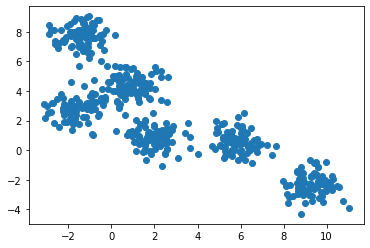

In [ ]:
# Plot and show scatter
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

In [ ]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(X_train)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_train)

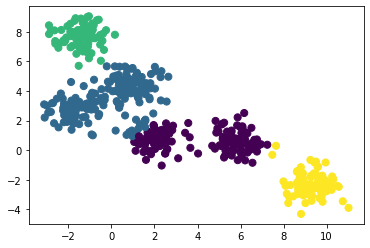

In [ ]:
# Plot the clusters
plt.scatter(X_train[:, 0], X_train[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [ ]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
 centers
 

array([[ 9.23739541, -2.28818689],
       [-0.1763659 ,  3.45421377],
       [-1.40499551,  7.73772248],
       [ 4.09924901,  0.64843677]])

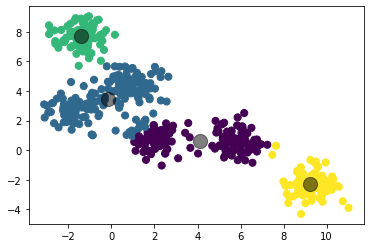

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

# Matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving players.csv to players.csv


In [ ]:
players_df = pd.read_csv("players.csv")
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [ ]:
check = players_df['height'].str.split('-',expand=True)
check.columns = [
    'first', 
    'second'
]

check.loc[(check['second'].notnull()), 'first'] = check[check['second'].notnull()]['first'].astype(np.int16) * 12 + check[check['second'].notnull()]['second'].astype(np.int16)

In [ ]:
players_df['height'] = check['first']
players_df['height'] = players_df['height'].astype(np.float32)
players_df['height'] /= 12

players_df

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,6.000000,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,5.833333,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,5.750000,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,6.083333,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,6.250000,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6.166667,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6.166667,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,6.500000,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,5.750000,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows=1, cols=2)
traces = [
    go.Histogram(
        x=players_df[col[0]], 
        nbinsx=col[1], 
        name=col[0]
    ) for col in [('height', 20), ('weight', 50)]
]

for i in range(len(traces)):
    fig.append_trace(
        traces[i], 
        (i // 2) + 1, 
        (i % 2) + 1
    )

fig.update_layout(
    title_text='Height & weight distributions',
    height=400,
    width=800
)

fig.show()

from google.colab import files
plt.savefig("height_weight.png")
files.download("height_weight.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
import plotly.express as px

check = players_df['collegeName'].value_counts().reset_index()
check.columns = [
    'college', 
    'players'
]
check = check.sort_values('players').tail(50)

fig = px.bar(
    check, 
    y='college', 
    x="players", 
    orientation='h', 
    title='Top 50 colleges by number of players',
    height=900,
    width=800
)

fig.show()

from google.colab import files
plt.savefig("top_colleges.png")
files.download("top_colleges.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
check = players_df['position'].value_counts().reset_index()
check.columns = [
    'position', 
    'players'
]
check = check.sort_values('players')

fig = px.bar(
    check, 
    y='position', 
    x="players", 
    orientation='h', 
    title='Top positions by number of players',
    height=600,
    width=800
)

fig.show()
from google.colab import files
plt.savefig("position.png")
files.download("position.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

**Play Data**

In [ ]:
plays_df = pd.read_csv("plays.csv")
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [ ]:
check = plays_df['quarter'].value_counts().reset_index()
check.columns = [
    'quarter', 
    'plays'
]
check = check.sort_values('plays')

fig = px.pie(
    check, 
    names='quarter', 
    values="plays",  
    title='Number of plays of every quarter',
    height=500,
    width=800
)

fig.show()
from google.colab import files
plt.savefig("play_quarter.png")
files.download("play_quarter.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
check = plays_df['down'].value_counts().reset_index()
check.columns = [
    'down', 
    'plays'
]
check = check.sort_values('plays')

fig = px.pie(
    check, 
    names='down', 
    values="plays",  
    title='Number of plays of every down',
    height=500,
    width=800
)

fig.show()
from google.colab import files
plt.savefig("play_down.png")
files.download("play_down.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
check = plays_df['playType'].value_counts().reset_index()
check.columns = [
    'type', 
    'plays'
]
check = check.sort_values('plays')

fig = px.pie(
    check, 
    names='type', 
    values="plays",  
    title='Number of plays of every type',
    height=500,
    width=800
)

fig.show()
from google.colab import files
plt.savefig("play_type.png")
files.download("play_type.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
check = plays_df['personnelO'].value_counts().reset_index()
check.columns = ['personnelO', 'plays']
check = check.sort_values('plays')

fig = px.bar(
    check, 
    y='personnelO', 
    x="plays", 
    orientation='h', 
    title='Number of plays for every personnelO',
    height=1000,
    width=800
)

fig.show()
from google.colab import files
plt.savefig("formation_O.png")
files.download("formation_O.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
check = plays_df['offenseFormation'].value_counts().reset_index()
check.columns = ['offenseFormation', 'plays']
check = check.sort_values('plays')

fig = px.pie(
    check, 
    names='offenseFormation', 
    values="plays",  
    title='Number of plays for every offense formation type',
    height=500,
    width=800
)

fig.show()
from google.colab import files
plt.savefig("offense_formation.png")
files.download("offense_formation.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
check = plays_df['defendersInTheBox'].value_counts().reset_index()
check.columns = ['defendersInTheBox', 'plays']
check = check.sort_values('plays')

fig = px.bar(
    check, 
    x='defendersInTheBox', 
    y="plays",  
    title='Number of plays for every number of defenders in the box',
    height=500,
    width=800
)

fig.show()

In [ ]:
check = plays_df['numberOfPassRushers'].value_counts().reset_index()
check.columns = ['numberOfPassRushers', 'plays']
check = check.sort_values('plays')

fig = px.bar(
    check, 
    x='numberOfPassRushers', 
    y="plays",  
    title='Number of plays for every number of pass rushers',
    height=500,
    width=800
)

fig.show()

In [ ]:
check = plays_df['passResult'].value_counts().reset_index()
check.columns = ['passResult', 'plays']
check = check.sort_values('plays')

fig = px.pie(
    check, 
    names='passResult', 
    values="plays",  
    title='Number of plays for every pass result',
    height=500,
    width=800
)

fig.show()

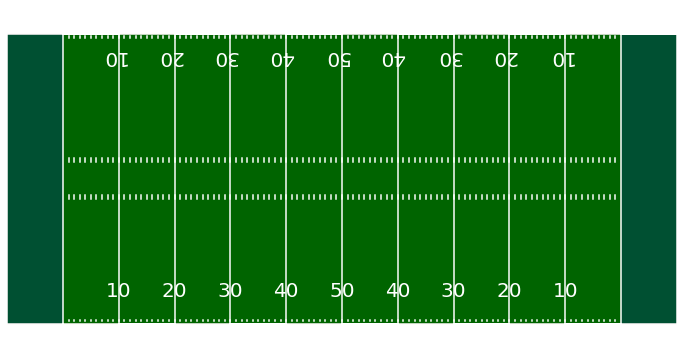